In [1]:
from static_visualization import scanpath_visualization, baseline_visualization, saccade_visualization, aoi_visualization
import pandas as pd

In [2]:
data = pd.read_excel('../test_data/itog_fix_1_aoi.xlsx')
data = data[data["tekst"] == 15]

In [3]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

data = remove_points(data, -1, 1, -1, 1)

## Baseline

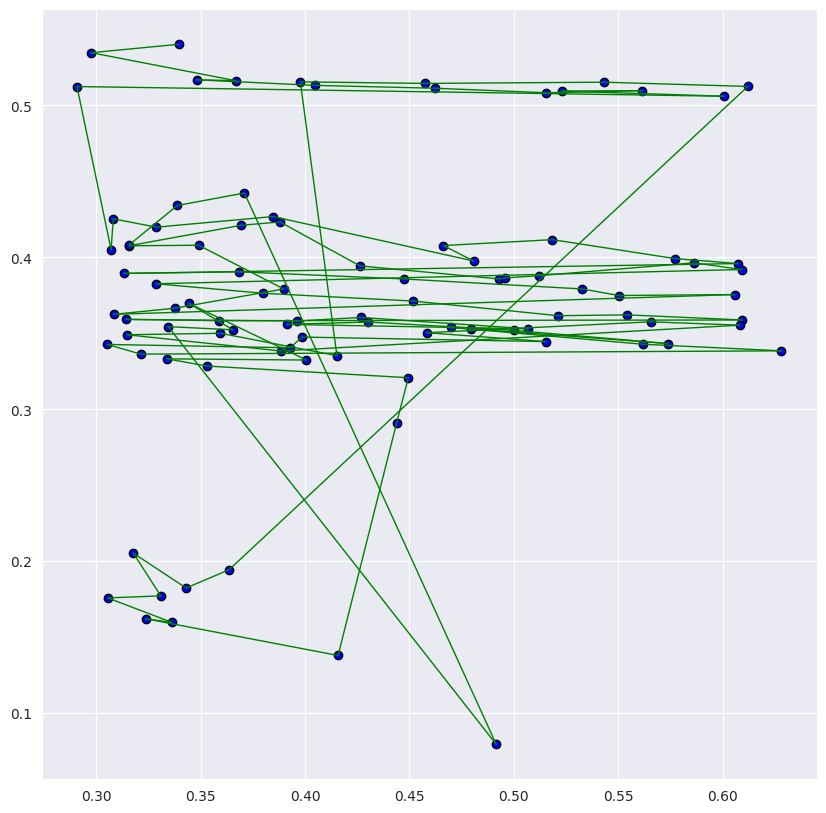

In [4]:
baseline_visualization(data, 'norm_pos_x', 'norm_pos_y')

## Visualization of areas of interest

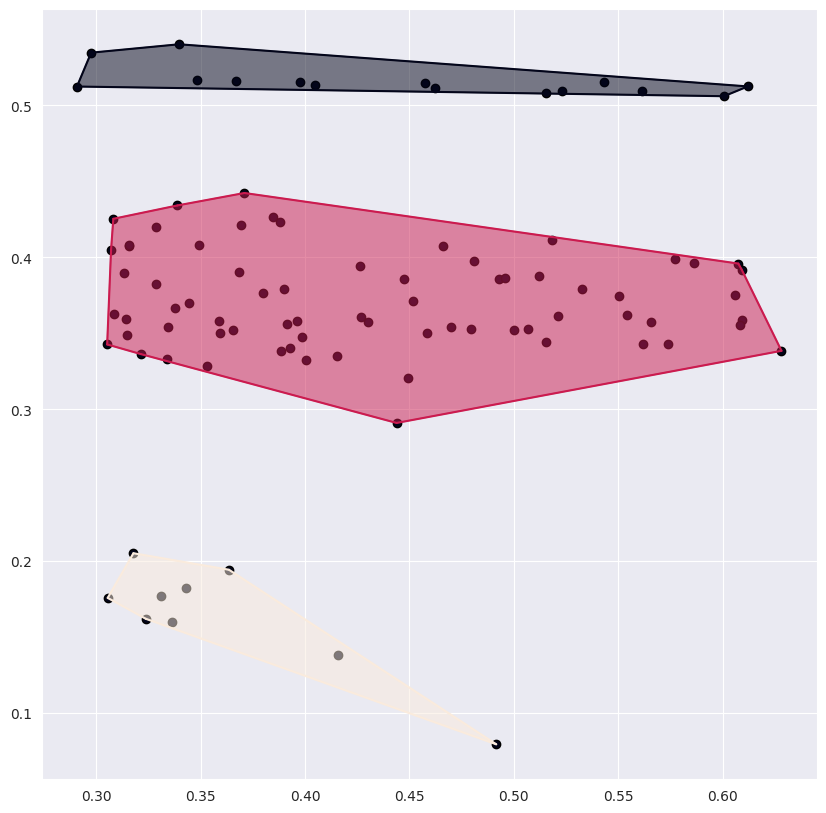

In [5]:
aoi_visualization(data, 'norm_pos_x', 'norm_pos_y', "AOI")

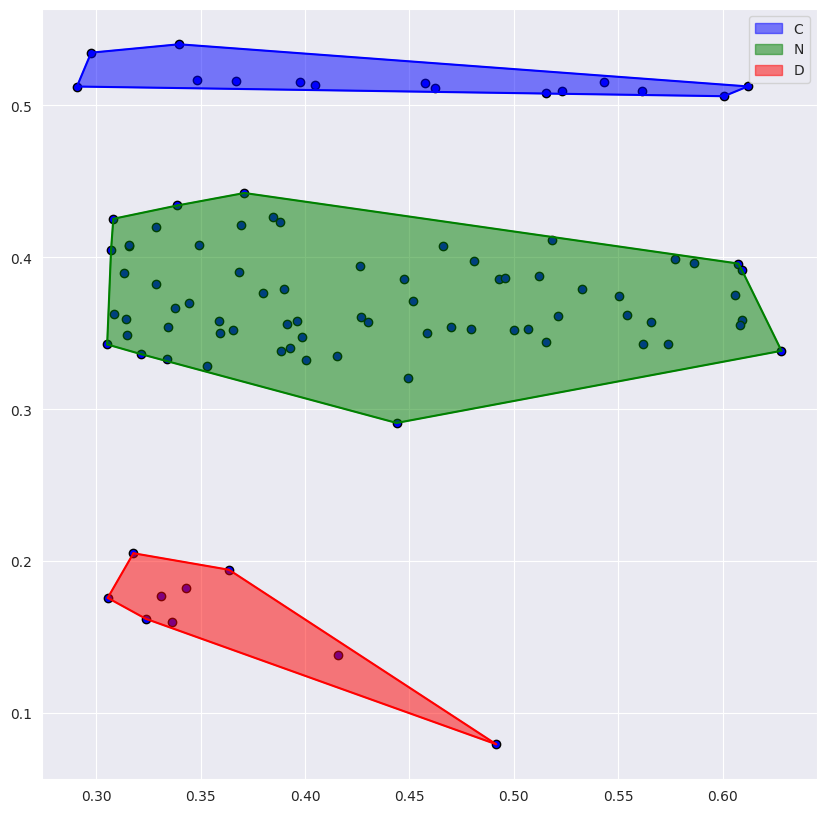

In [6]:
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", aoi='AOI', show_legend=True, show_hull=True, only_points=True, aoi_c={'C':'blue', 'N':'green', 'D':'red'})

## Visualization of scanpath (enumeration of fixations; green vectors — saccades color; red vectors — regression color; "latest" vectors are darker)

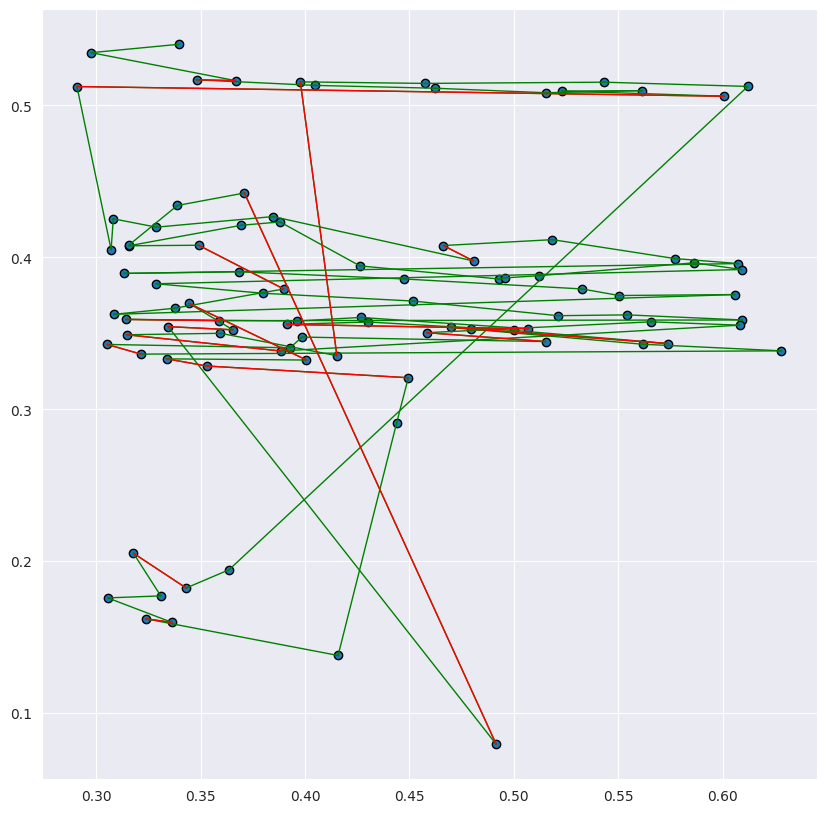

In [7]:
saccade_visualization(data, "norm_pos_x", "norm_pos_y", regression_color="red")

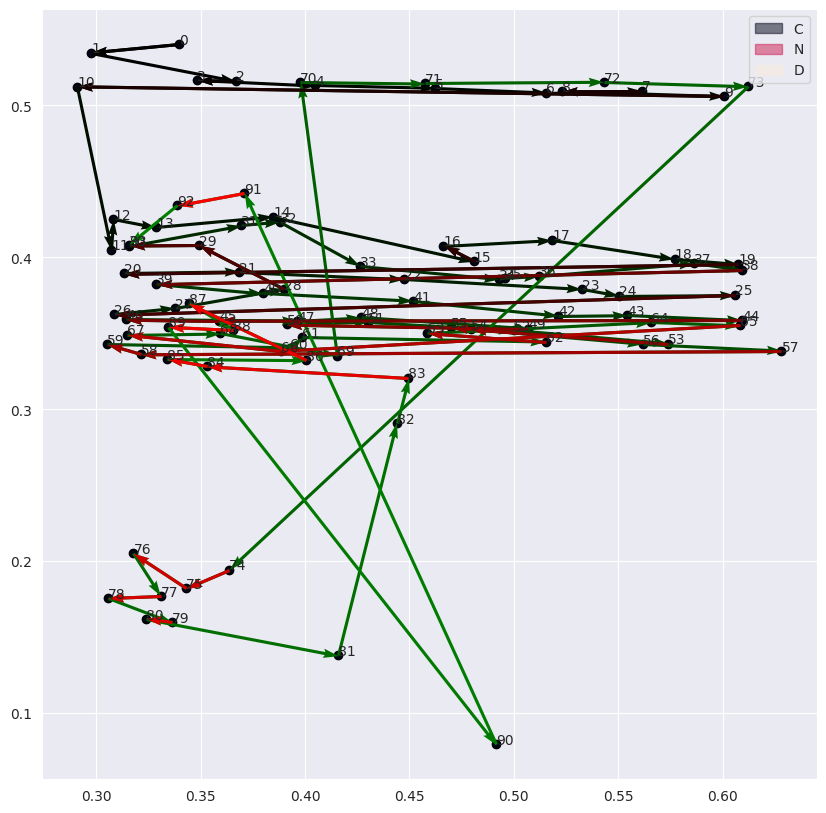

In [8]:
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", time_stamps="start_timestamp", aoi='AOI', show_legend=True, regression_color='red', seq_colormap=True, is_vectors=True, points_enumeration=True, rule=(180, ), deviation=(45,))

## Visualization of fixations (enumerated; the shape of the fixations depends on the duration; the color of the areas of interest has been changed)

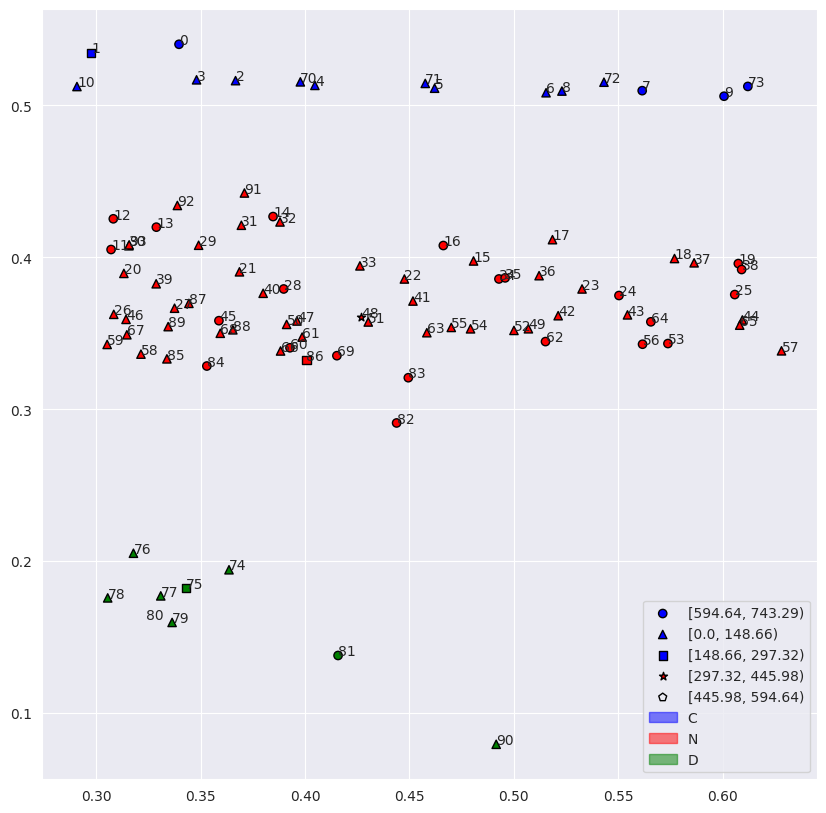

In [9]:
aoi_color = dict()
aoi_color['C'] = 'blue'
aoi_color['N'] = 'red'
aoi_color['D'] = 'green'
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", shape_column="duration", aoi='AOI', show_legend=True, points_enumeration=True, only_points=True, aoi_c=aoi_color)